In [59]:
import pandas as pd
import os

In [60]:
files = os.listdir('./lc_bench_results/predicted_ebe_performance')
files = [f for f in files if f.endswith('.csv')]
files.sort()

target = 'final_val_accuracy'

In [61]:
# Build a dict that stores the dfs
dfs = {}
for f in files:
    # Read the csv file into a dataframe
    df = pd.read_csv(f'./lc_bench_results/predicted_ebe_performance/{f}')
    # Get the name of the file without the extension
    name = f.split('_')[-1].split('.')[0]
    if name == 'complete':
        name = 'jungle_chess_2pcs_raw_endgame_complete'
    elif name == 'numerai28':
        name = 'numerai28.6'
    # Store the dataframe in the dict
    dfs[name] = df.sort_values(target, ascending=False)

    

In [62]:
missing_dfs = ["kr-vs-kp", "mfeat-factors", "credit-g", "vehicle", "kc1", "KDDCup09_appetency", "airlines", "bank-marketing", "blood-transfusion-service-center", "cnae-9", "nomao", "phoneme", "adult", "covertype", "Amazon_employee_access", "higgs", "numerai28.6", "connect-4", "shuttle", "car", "Australian", "segment", "Fashion-MNIST", "jungle_chess_2pcs_raw_endgame_complete", "APSFailure", "christine", "jasmine", "sylvine", "albert", "MiniBooNE", "fabert", "volkert", "dionis", "jannis", "helena"]

for key in missing_dfs:
    if key not in dfs:
        # Add the key to the dictionary with an empty series as the value
        dfs[key] = pd.DataFrame(columns=['final_val_accuracy'])

In [63]:
import matplotlib.pyplot as plt

In [64]:

dfs['APSFailure'].sample()

,dataset_name,batch_size,learning_rate_scheduler,max_dropout,optimizer,cosine_annealing_T_max,cosine_annealing_eta_min,activation,max_units,mlp_shape,num_layers,learning_rate,momentum,weight_decay,final_val_accuracy
7,APSFailure,512,none,0.0,sgd,NaN,0,tanh,361,funnel,3,0.009322,0.8,0.001,0.95856


In [65]:
bench_df = pd.read_csv('../experiments/lc_bench_results/all_datasets_lw_clean.csv')

In [66]:
bench_df['dataset_name'].unique()

array(['kc1', 'airlines', 'mfeat-factors', 'bank-marketing',
       'blood-transfusion-service-center', 'cnae-9', 'nomao', 'phoneme',
       'adult', 'covertype', 'higgs', 'numerai28.6', 'kr-vs-kp',
       'credit-g', 'connect-4', 'shuttle', 'car', 'Australian', 'segment',
       'Fashion-MNIST', 'jungle_chess_2pcs_raw_endgame_complete',
       'APSFailure', 'christine', 'jasmine', 'sylvine', 'MiniBooNE',
       'fabert', 'volkert', 'dionis', 'jannis', 'helena', 'vehicle'],
      dtype=object)

In [67]:
bench_df[bench_df['dataset_name'] =='jungle_chess_2pcs_raw_endgame_complete']

,dataset_name,batch_size,learning_rate_scheduler,max_dropout,optimizer,cosine_annealing_T_max,cosine_annealing_eta_min,activation,max_units,mlp_shape,num_layers,learning_rate,momentum,weight_decay,final_val_accuracy
40000,jungle_chess_2pcs_raw_endgame_complete,71,cosine_annealing,0.025926,sgd,50,1.000000e-08,relu,293,funnel,3,0.001824,0.213252,0.020473,0.657215
40001,jungle_chess_2pcs_raw_endgame_complete,457,cosine_annealing,0.547232,sgd,50,1.000000e-08,relu,950,funnel,4,0.012393,0.164114,0.097628,0.622805
40002,jungle_chess_2pcs_raw_endgame_complete,352,cosine_annealing,0.331980,sgd,50,1.000000e-08,relu,623,funnel,1,0.000210,0.391250,0.052986,0.529263
40003,jungle_chess_2pcs_raw_endgame_complete,329,cosine_annealing,0.968541,sgd,50,1.000000e-08,relu,712,funnel,3,0.000499,0.102648,0.043053,0.617760
40004,jungle_chess_2pcs_raw_endgame_complete,16,cosine_annealing,0.501875,sgd,50,1.000000e-08,relu,252,funnel,1,0.000267,0.165046,0.041857,0.616852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,jungle_chess_2pcs_raw_endgame_complete,155,cosine_annealing,0.635370,sgd,50,1.000000e-08,relu,325,funnel,2,0.000246,0.438175,0.084043,0.623713
41996,jungle_chess_2pcs_raw_endgame_complete,490,cosine_annealing,0.728061,sgd,50,1.000000e-08,relu,237,funnel,4,0.009034,0.364982,0.066421,0.662967
41997,jungle_chess_2pcs_raw_endgame_complete,166,cosine_annealing,0.363454,sgd,50,1.000000e-08,relu,236,funnel,3,0.037966,0.496414,0.017774,0.716953
41998,jungle_chess_2pcs_raw_endgame_complete,460,cosine_annealing,0.043747,sgd,50,1.000000e-08,relu,711,funnel,2,0.000971,0.108313,0.043999,0.630979


In [68]:
dfs.keys()

dict_keys(['APSFailure', 'Fashion-MNIST', 'MiniBooNE', 'adult', 'airlines', 'bank-marketing', 'car', 'christine', 'cnae-9', 'connect-4', 'covertype', 'dionis', 'fabert', 'helena', 'higgs', 'jannis', 'jasmine', 'jungle_chess_2pcs_raw_endgame_complete', 'kc1', 'kr-vs-kp', 'mfeat-factors', 'nomao', 'numerai28.6', 'phoneme', 'segment', 'shuttle', 'sylvine', 'vehicle', 'volkert', 'credit-g', 'KDDCup09_appetency', 'blood-transfusion-service-center', 'Amazon_employee_access', 'Australian', 'albert'])

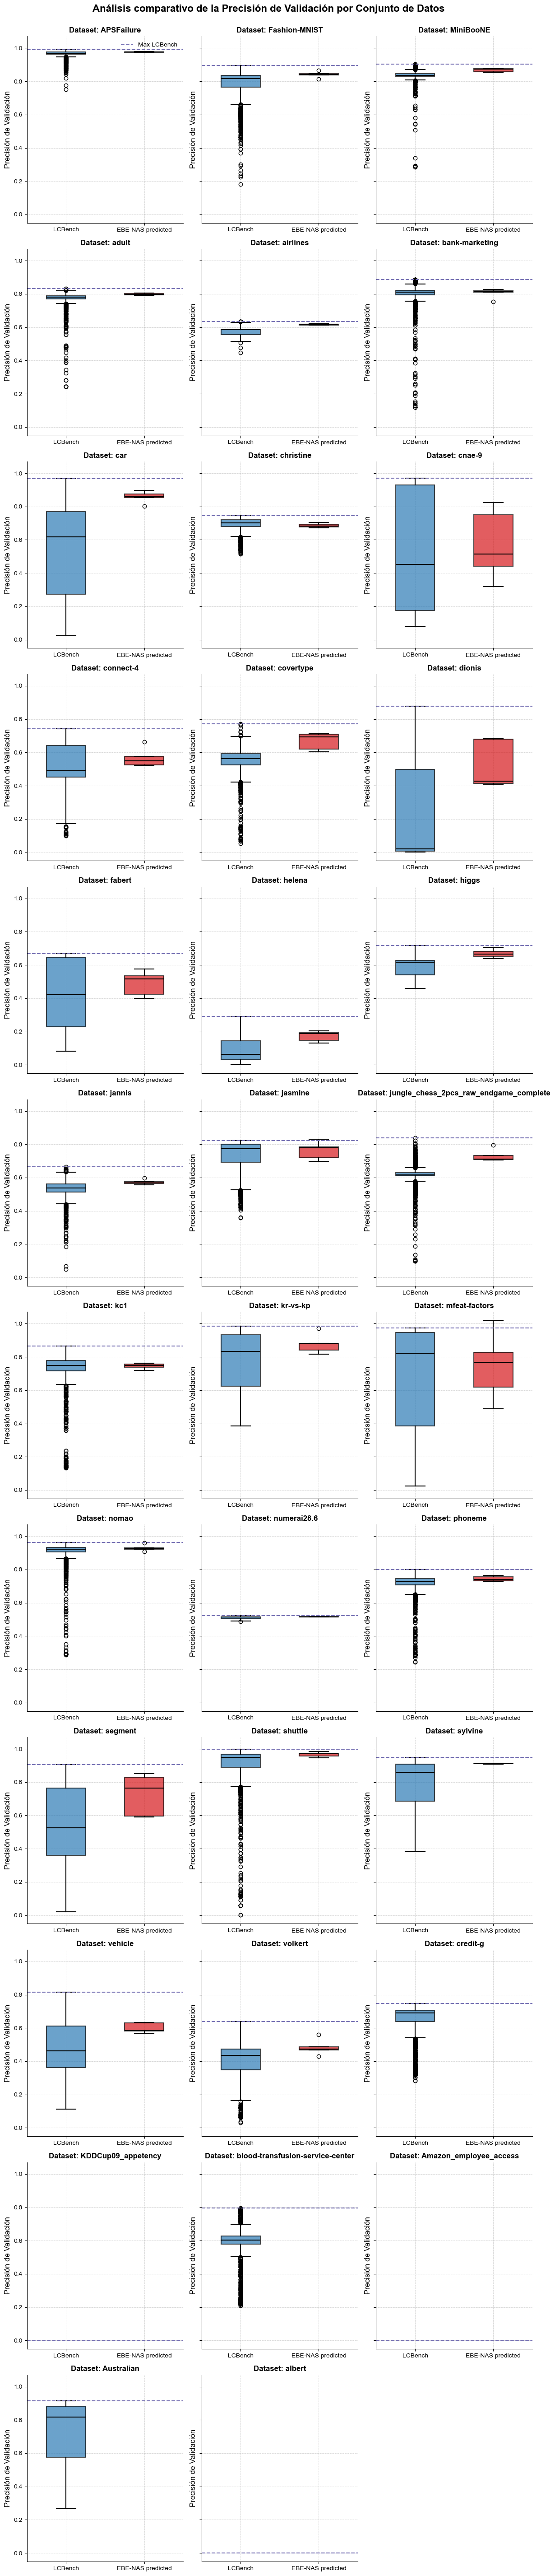

In [71]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Configure matplotlib for scientific visualization
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.linewidth': 0.8,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.frameon': False
})

# Calculate grid dimensions
n_models = len(dfs)
n_cols = min(3, n_models)
n_rows = int(np.ceil(n_models / n_cols))

# Create figure with appropriate aspect ratio
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 5), 
                         sharey=True, constrained_layout=False)
axes = np.array(axes).flatten() if n_models > 1 else np.array([axes]).flatten()

# Define color palette for visualization consistency
palette = ['#2c7bb6', '#d7191c']  # Scientific colorblind-friendly palette
boxprops = dict(linewidth=1.5)
whiskerprops = dict(linewidth=1.5)
capprops = dict(linewidth=1.5)
medianprops = dict(linewidth=1.5, color='black')

# Iterate through models and create visualizations
for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i]
    benchmark_subset = bench_df[bench_df['dataset_name'] == name].copy()
    
    # Extract performance metrics
    benchmark_accuracy = benchmark_subset['final_val_accuracy'].values
    ebe_accuracy = df[target].head(5).values
    
    # Generate boxplot with scientific styling
    box = ax.boxplot([benchmark_accuracy, ebe_accuracy],
                    patch_artist=True,
                    boxprops=boxprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    medianprops=medianprops,
                    tick_labels=['LCBench', 'EBE-NAS predicted'],
                    widths=0.5)

    # Apply consistent coloring
    for patch, color in zip(box['boxes'], palette):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Indicate maximum benchmark performance
    if len(benchmark_accuracy) == 0: 
        max_benchmark = 0
    else:
        max_benchmark = np.max(benchmark_accuracy)
    ax.axhline(y=max_benchmark, color='#7570b3', linestyle='--', 
               linewidth=1.5, label='Max LCBench')
    
    # Configure axis properties
    ax.set_title(f'Dataset: {name}', fontweight='bold')
    ax.set_ylabel('Precisión de Validación')
    ax.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show legend for first subplot to avoid redundancy
    if i == 0:
        ax.legend(frameon=False, loc='upper right')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title with proper scientific notation
fig.suptitle('Análisis comparativo de la Precisión de Validación por Conjunto de Datos', 
             fontsize=16, fontweight='bold', y=0.98)

# Ensure proper layout with space for title
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save figure in publication-ready format before displaying
# plt.savefig('model_performance_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.savefig('model_performance_comparison.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_69156\519956824.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc='upper right')


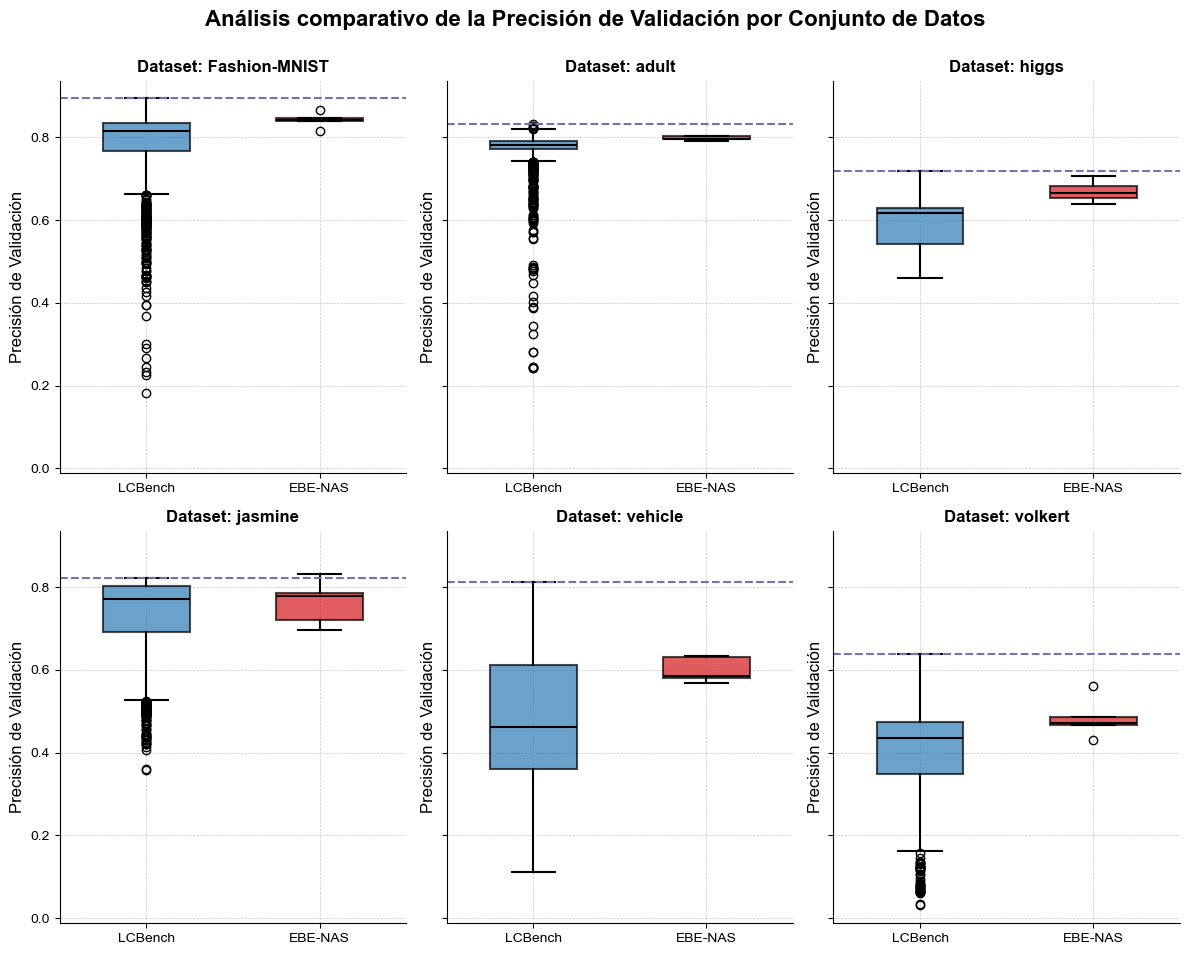

In [72]:
six_datasets = ['Fashion-MNIST', 'adult', 'higgs', 'jasmine', 'vehicle', 'volkert']
# Calculate grid dimensions
n_models = 6
n_cols = min(3, n_models)
n_rows = int(np.ceil(n_models / n_cols))

# Create figure with appropriate aspect ratio
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 5), 
                         sharey=True, constrained_layout=False)
axes = np.array(axes).flatten() if n_models > 1 else np.array([axes]).flatten()

# Define color palette for visualization consistency
palette = ['#2c7bb6', '#d7191c']  # Scientific colorblind-friendly palette
boxprops = dict(linewidth=1.5)
whiskerprops = dict(linewidth=1.5)
capprops = dict(linewidth=1.5)
medianprops = dict(linewidth=1.5, color='black')

subset_dfs = {k: v for k, v in dfs.items() if k in six_datasets}
# Iterate through models and create visualizations
for i, (name, df) in enumerate(subset_dfs.items()):
    if name in six_datasets:
        ax = axes[i]
        benchmark_subset = bench_df[bench_df['dataset_name'] == name].copy()
        
        # Extract performance metrics
        benchmark_accuracy = benchmark_subset['final_val_accuracy'].values
        ebe_accuracy = df[target].head(5).values
        
        # Generate boxplot with scientific styling
        box = ax.boxplot([benchmark_accuracy, ebe_accuracy],
                        patch_artist=True,
                        boxprops=boxprops,
                        whiskerprops=whiskerprops,
                        capprops=capprops,
                        medianprops=medianprops,
                        tick_labels=['LCBench', 'EBE-NAS'],
                        widths=0.5)

        # Apply consistent coloring
        for patch, color in zip(box['boxes'], palette):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # Indicate maximum benchmark performance
        max_benchmark = np.max(benchmark_accuracy)
        ax.axhline(y=max_benchmark, color='#7570b3', linestyle='--', 
                linewidth=1.5)
        
        # Configure axis properties
        ax.set_title(f'Dataset: {name}', fontweight='bold')
        ax.set_ylabel('Precisión de Validación')
        ax.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Only show legend for first subplot to avoid redundancy
        if i == 0:
            ax.legend(frameon=False, loc='upper right')

    # # Remove unused subplots
    # for j in range(i + 1, len(axes)):
    #     fig.delaxes(axes[j])

    # Add main title with proper scientific notation
    fig.suptitle('Análisis comparativo de la Precisión de Validación por Conjunto de Datos', 
                fontsize=16, fontweight='bold', y=0.98)

    # Ensure proper layout with space for title
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save figure in publication-ready format before displaying
# plt.savefig('model_performance_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('model_performance_comparison_6ds.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

# EBE_ES Training

In [73]:
# Load EBE_ES data
files = os.listdir('../experiments/lc_bench_results/es_trained_EBE_models')
# Build a dict that stores the dfs
ebe_dfs = {}
for f in files:
    # Read the csv file into a dataframe
    df = pd.read_csv(f'../experiments/lc_bench_results/es_trained_EBE_models/{f}')
    # Get the name of the file without the extension
    name = f.split('_')[-1].split('.')[0]
    if name == 'complete':
        name = 'ES-jungle_chess_2pcs_raw_endgame_complete'
    elif name == 'ES-numerai28':
        name = 'ES-numerai28.6'

    # Store the dataframe in the dict
    ebe_dfs[name] = df.sort_values('ES_val_acc', ascending=False)

# Load 50 epochs EBE
files = os.listdir('../experiments/lc_bench_results/50 epochs_EBE')
# Build a dict that stores the dfs
ebe50_dfs = {}
for f in files:
    # Read the csv file into a dataframe
    df = pd.read_csv(f'../experiments/lc_bench_results/50 epochs_EBE/{f}')
    # Get the name of the file without the extension
    name = f.split('0-')[-1].split('.')[0]
    if name == 'complete':
        name = 'jungle_chess_2pcs_raw_endgame_complete'
    elif name == 'numerai28':
        name = 'numerai28.6'

    # Store the dataframe in the dict
    ebe50_dfs[name] = df.sort_values('50e_val_acc', ascending=False)


In [74]:
for key in missing_dfs:
    if key not in ebe50_dfs:
        # Add the key to the dictionary with an empty dictionary as the value
        ebe50_dfs[key] = pd.DataFrame(columns=['50e_val_acc'])
    if key not in ebe_dfs:
        # Add the key to the dictionary with an empty dictionary as the value
        ebe_dfs[f'ES-{key}'] = pd.DataFrame(columns=['ES_val_acc'])

In [75]:
display(ebe50_dfs.keys())

dict_keys(['adult', 'airlines', 'APSFailure', 'Australian', 'bank-marketing', 'blood-transfusion-service-center', 'car', 'christine', 'cnae-9', 'connect-4', 'covertype', 'credit-g', 'dionis', 'fabert', 'Fashion-MNIST', 'helena', 'higgs', 'jannis', 'jasmine', 'jungle_chess_2pcs_raw_endgame_complete', 'kc1', 'kr-vs-kp', 'mfeat-factors', 'MiniBooNE', 'nomao', 'numerai28.6', 'phoneme', 'segment', 'shuttle', 'sylvine', 'vehicle', 'volkert', 'KDDCup09_appetency', 'Amazon_employee_access', 'albert'])

In [76]:
len(ebe_dfs)

35

In [77]:
ebe_dfs.keys()

dict_keys(['ES-adult', 'ES-airlines', 'ES-APSFailure', 'ES-Australian', 'ES-bank-marketing', 'ES-blood-transfusion-service-center', 'ES-car', 'ES-christine', 'ES-cnae-9', 'ES-connect-4', 'ES-covertype', 'ES-credit-g', 'ES-dionis', 'ES-fabert', 'ES-Fashion-MNIST', 'ES-helena', 'ES-higgs', 'ES-jannis', 'ES-jasmine', 'ES-jungle_chess_2pcs_raw_endgame_complete', 'ES-kc1', 'ES-kr-vs-kp', 'ES-mfeat-factors', 'ES-MiniBooNE', 'ES-nomao', 'ES-numerai28.6', 'ES-phoneme', 'ES-segment', 'ES-shuttle', 'ES-sylvine', 'ES-vehicle', 'ES-volkert', 'ES-KDDCup09_appetency', 'ES-Amazon_employee_access', 'ES-albert'])

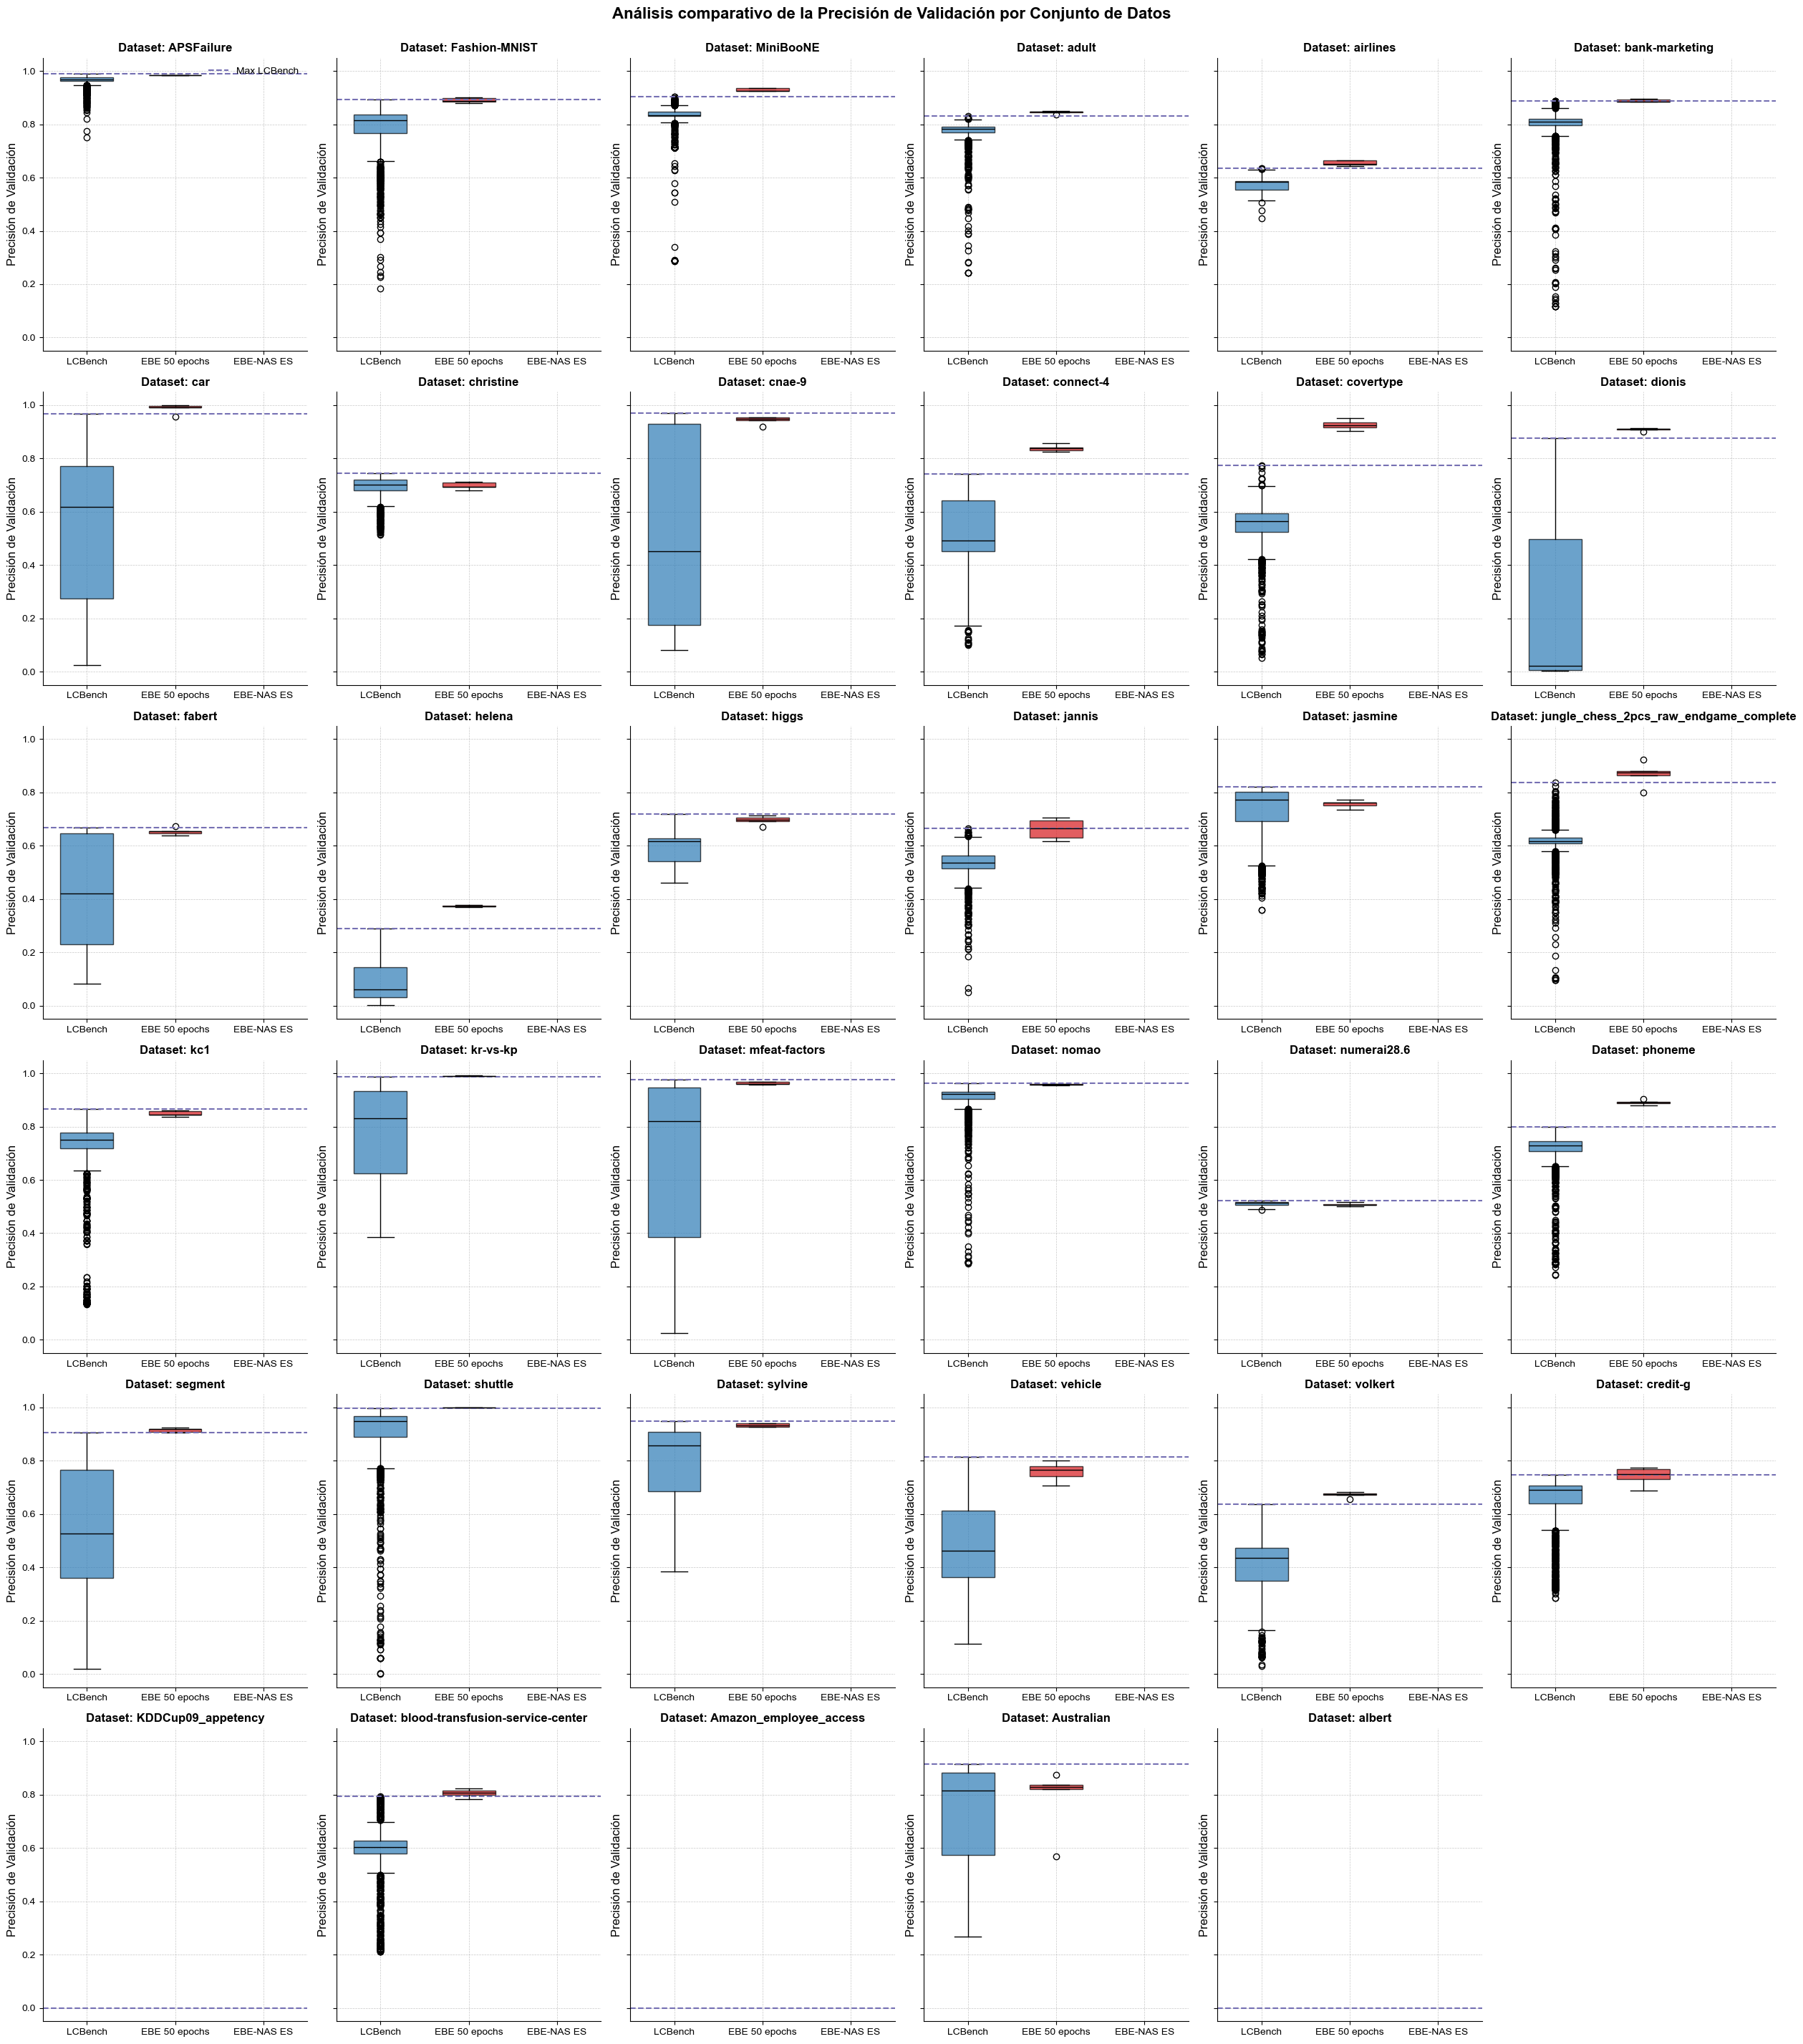

In [80]:
# Calculate grid dimensions
n_models = len(dfs)
n_cols = min(6, n_models)
n_rows = int(np.ceil(n_models / n_cols))

# Create figure with appropriate aspect ratio
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows), 
                         sharey=True, constrained_layout=False)
axes = np.array(axes).flatten() if n_models > 1 else np.array([axes]).flatten()

# Define color palette for visualization consistency
palette = ['#2c7bb6', '#d7191c', 'orange', 'green']  # Scientific colorblind-friendly palette
boxprops = dict(linewidth=1)
whiskerprops = dict(linewidth=1)
capprops = dict(linewidth=1)
medianprops = dict(linewidth=1, color='black')

# Iterate through models and create visualizations
for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i]
    benchmark_subset = bench_df[bench_df['dataset_name'] == name].copy()
    ebe_df = ebe_dfs[f'ES-{name}'].copy()
    ebe50 = ebe50_dfs[name].copy()
    
    # Extract performance metrics
    benchmark_accuracy = benchmark_subset['final_val_accuracy'].values
    # ebe_accuracy = df[target].head(5).values
    ebe_es_accuracy = ebe_df['ES_val_acc'].values
    ebe_50_accuracy = ebe50['50e_val_acc'].values
    
    # Generate boxplot with scientific styling
    box = ax.boxplot([benchmark_accuracy, ebe_50_accuracy, ebe_es_accuracy],
                    patch_artist=True,
                    boxprops=boxprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    medianprops=medianprops,
                    tick_labels=['LCBench', 'EBE 50 epochs', 'EBE-NAS ES'],
                    widths=0.6)

    # Apply consistent coloring
    for patch, color in zip(box['boxes'], palette):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Indicate maximum benchmark performance
    if len(benchmark_accuracy) == 0: 
        max_benchmark = 0
    else:
        max_benchmark = np.max(benchmark_accuracy)
    ax.axhline(y=max_benchmark, color='#7570b3', linestyle='--', 
               linewidth=1.5, label='Max LCBench')
    
    # Configure axis properties
    ax.set_title(f'Dataset: {name}', fontweight='bold')
    ax.set_ylabel('Precisión de Validación')
    ax.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show legend for first subplot to avoid redundancy
    if i == 0:
        ax.legend(frameon=False, loc='upper right')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title
fig.suptitle('Análisis comparativo de la Precisión de Validación por Conjunto de Datos', 
             fontsize=16, fontweight='bold', y=0.98)

# Ensure proper layout with space for title
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.savefig('model_performance_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('model_performance_comparison.png', format='png', dpi=150, bbox_inches='tight')

plt.show()

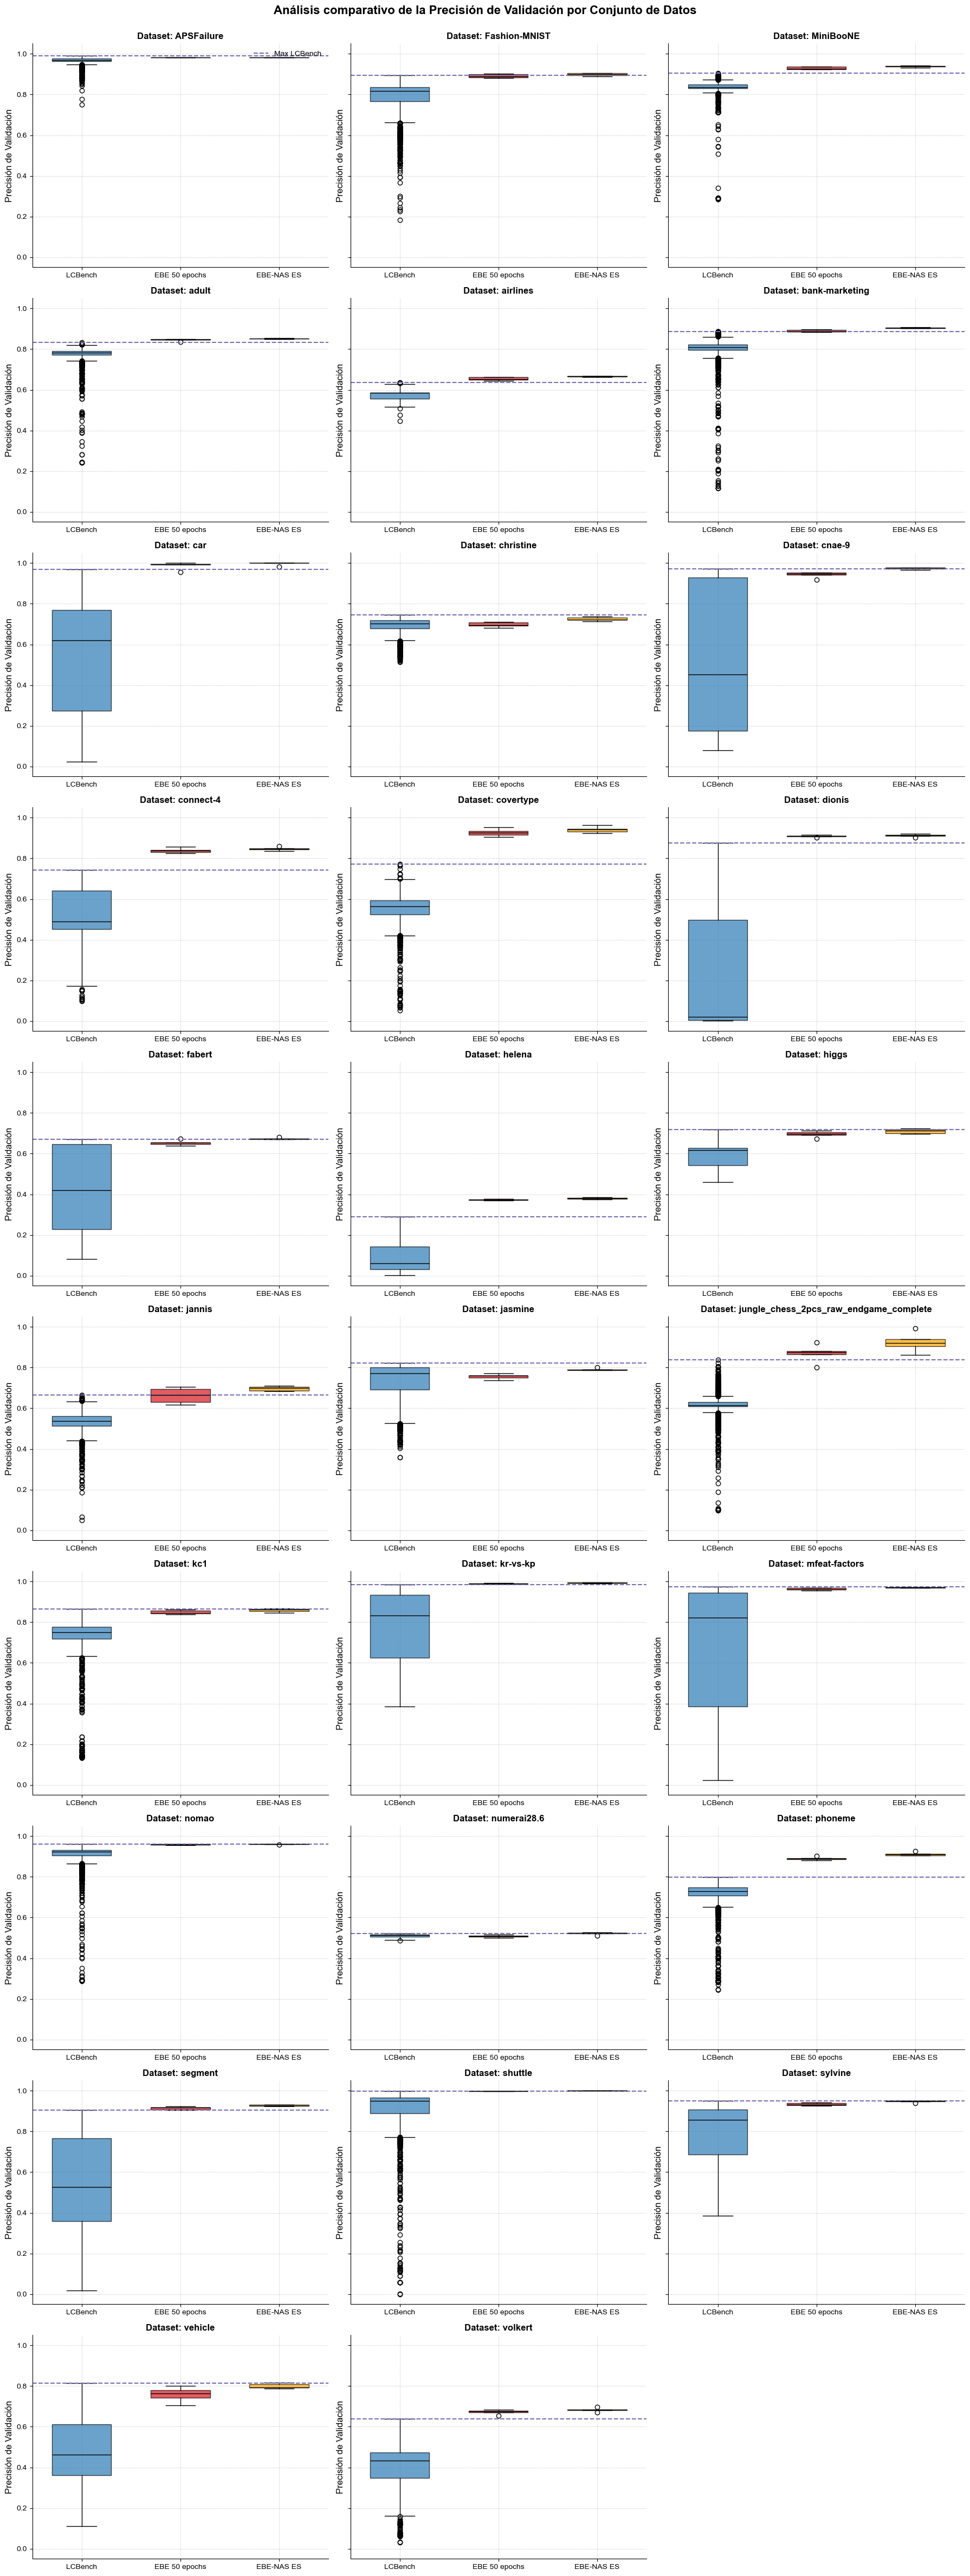

In [ ]:
# Calculate grid dimensions
n_models = len(dfs)
n_cols = min(3, n_models)
n_rows = int(np.ceil(n_models / n_cols))

# Create figure with appropriate aspect ratio
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), 
                         sharey=True, constrained_layout=False)
axes = np.array(axes).flatten() if n_models > 1 else np.array([axes]).flatten()

# Define color palette for visualization consistency
palette = ['#2c7bb6', '#d7191c', 'orange', 'green']  # Scientific colorblind-friendly palette
boxprops = dict(linewidth=1)
whiskerprops = dict(linewidth=1)
capprops = dict(linewidth=1)
medianprops = dict(linewidth=1, color='black')

# Iterate through models and create visualizations
for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i]
    benchmark_subset = bench_df[bench_df['dataset_name'] == name].copy()
    ebe_df = ebe_dfs[f'ES-{name}'].copy()
    ebe50 = ebe50_dfs[name].copy()
    
    # Extract performance metrics
    benchmark_accuracy = benchmark_subset['final_val_accuracy'].values
    ebe_accuracy = df[target].head(5).values
    ebe_es_accuracy = ebe_df['ES_val_acc'].values
    ebe_50_accuracy = ebe50['50e_val_acc'].values
    
    # Generate boxplot with scientific styling
    box = ax.boxplot([benchmark_accuracy, ebe_50_accuracy, ebe_es_accuracy],
                    patch_artist=True,
                    boxprops=boxprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    medianprops=medianprops,
                    tick_labels=['LCBench', 'EBE 50 epochs', 'EBE-NAS ES'],
                    widths=0.6)

    # Apply consistent coloring
    for patch, color in zip(box['boxes'], palette):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Indicate maximum benchmark performance
    max_benchmark = np.max(benchmark_accuracy)
    ax.axhline(y=max_benchmark, color='#7570b3', linestyle='--', 
               linewidth=1.5, label='Max LCBench')
    
    # Configure axis properties
    ax.set_title(f'Dataset: {name}', fontweight='bold')
    ax.set_ylabel('Precisión de Validación')
    ax.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show legend for first subplot to avoid redundancy
    if i == 0:
        ax.legend(frameon=False, loc='upper right')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title
fig.suptitle('Análisis comparativo de la Precisión de Validación por Conjunto de Datos', 
             fontsize=16, fontweight='bold', y=0.98)

# Ensure proper layout with space for title
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save figure in publication-ready format before displaying
# plt.savefig('model_performance_comparison_6ds.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('model_performance_comparison_35ds.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

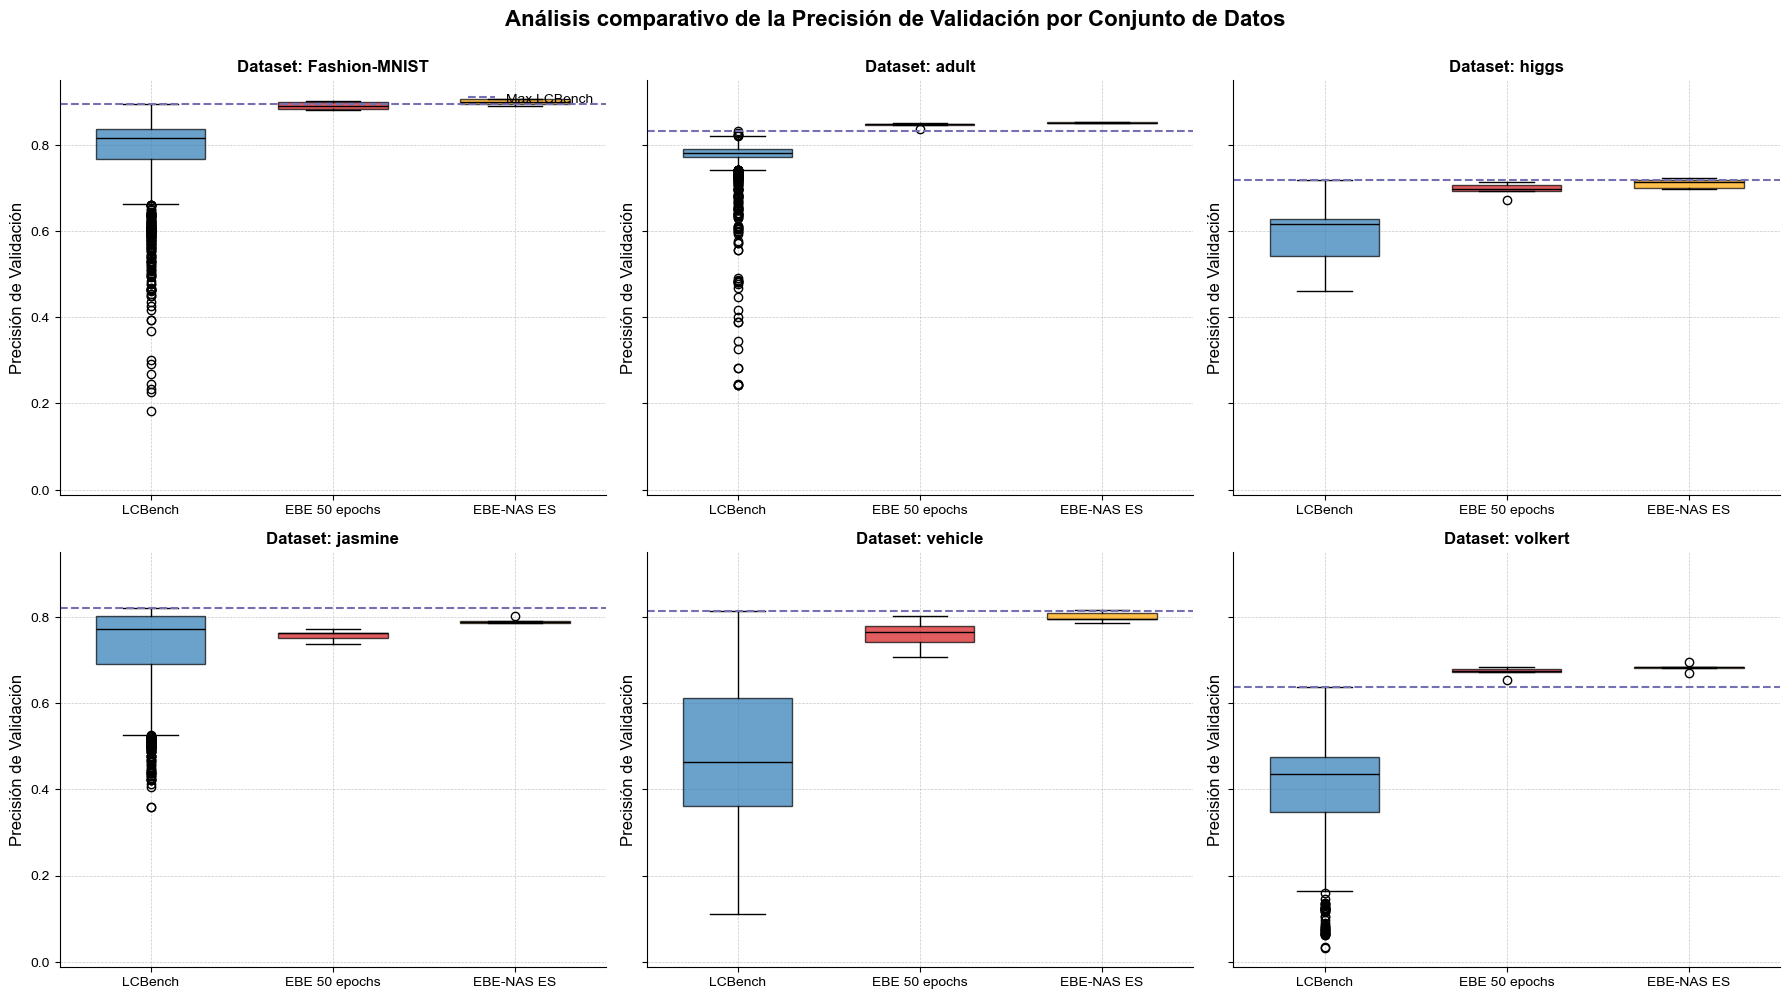

In [ ]:
# Calculate grid dimensions
n_models = len(dfs)
n_cols = min(3, n_models)
n_rows = int(np.ceil(n_models / n_cols))

# Create figure with appropriate aspect ratio
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), 
                         sharey=True, constrained_layout=False)
axes = np.array(axes).flatten() if n_models > 1 else np.array([axes]).flatten()

# Define color palette for visualization consistency
palette = ['#2c7bb6', '#d7191c', 'orange', 'green']  # Scientific colorblind-friendly palette
boxprops = dict(linewidth=1)
whiskerprops = dict(linewidth=1)
capprops = dict(linewidth=1)
medianprops = dict(linewidth=1, color='black')

# Iterate through models and create visualizations
for i, (name, df) in enumerate(subset_dfs.items()):
    ax = axes[i]
    benchmark_subset = bench_df[bench_df['dataset_name'] == name].copy()
    ebe_df = ebe_dfs[f'ES-{name}'].copy()
    ebe50 = ebe50_dfs[name].copy()
    
    # Extract performance metrics
    benchmark_accuracy = benchmark_subset['final_val_accuracy'].values
    ebe_accuracy = df[target].head(5).values
    ebe_es_accuracy = ebe_df['ES_val_acc'].values
    ebe_50_accuracy = ebe50['50e_val_acc'].values
    
    # Generate boxplot with scientific styling
    box = ax.boxplot([benchmark_accuracy, ebe_50_accuracy, ebe_es_accuracy],
                    patch_artist=True,
                    boxprops=boxprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    medianprops=medianprops,
                    tick_labels=['LCBench', 'EBE 50 epochs', 'EBE-NAS ES'],
                    widths=0.6)

    # Apply consistent coloring
    for patch, color in zip(box['boxes'], palette):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Indicate maximum benchmark performance
    max_benchmark = np.max(benchmark_accuracy)
    ax.axhline(y=max_benchmark, color='#7570b3', linestyle='--', 
               linewidth=1.5, label='Max LCBench')
    
    # Configure axis properties
    ax.set_title(f'Dataset: {name}', fontweight='bold')
    ax.set_ylabel('Precisión de Validación')
    ax.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show legend for first subplot to avoid redundancy
    if i == 0:
        ax.legend(frameon=False, loc='upper right')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title
fig.suptitle('Análisis comparativo de la Precisión de Validación por Conjunto de Datos', 
             fontsize=16, fontweight='bold', y=0.98)

# Ensure proper layout with space for title
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save figure in publication-ready format before displaying
# plt.savefig('model_performance_comparison_6ds.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('model_performance_comparison_6ds.png', format='png', dpi=300, bbox_inches='tight')

plt.show()